In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The code for this tutorial can be found in:

https://github.com/OWI-Lab/data_selector

and

https://vub.sharepoint.com/teams/ORG_OWI_labVUB/Shared%20Documents/Forms/AllItems.aspx?id=%2Fteams%2FORG%5FOWI%5FlabVUB%2FShared%20Documents%2F00%2EResearch%2FPhD%2DResearch%2FMaximillian%20Weil%2FCode%2Fdata%5Fselector&viewid=0c2837bb%2D434a%2D4ace%2Da29f%2D68f1858ee60f


In [16]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dash

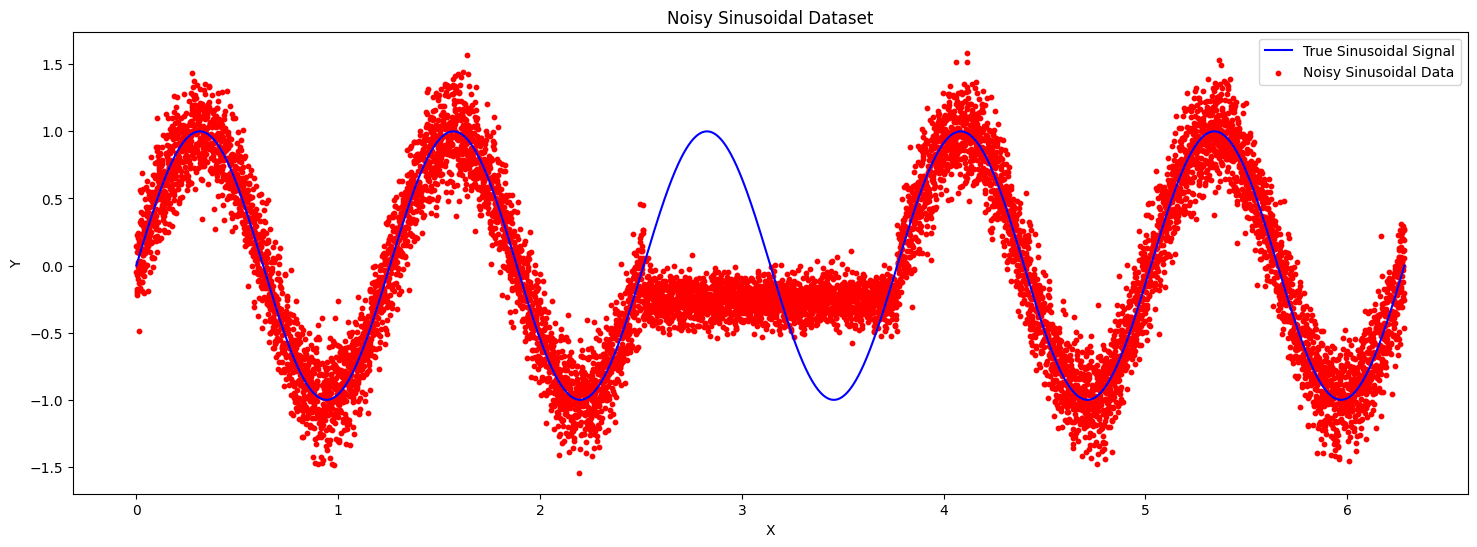

In [17]:
from manual_data_selector.data.create_test_dataset import generate_noisy_sinusoidal, flatten_signal

# Example usage
num_samples = 10000
frequency = 5
noise_level = 0.2  # Adjust the noise level here

x, y_noisy = generate_noisy_sinusoidal(num_samples, frequency, noise_level)
y_flattened = flatten_signal(y_noisy, int(2/5*len(y_noisy)), int(3/5*len(y_noisy)))  # Adjust the start and end indices here

# Plotting the dataset
plt.figure(figsize=(18, 6))
plt.plot(x, np.sin(frequency * x), label='True Sinusoidal Signal', color='blue')
plt.scatter(x, y_flattened, label='Noisy Sinusoidal Data', color='red', s=10)
plt.title('Noisy Sinusoidal Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [18]:
df = pd.DataFrame({'x': x, 'y': y_flattened, 'z':np.sin(frequency * x)})

Use the Lasso selector on the top right of the figure to select data.

You can select multiple parts of the data, but have to confirm selection in the bottom left after every selection!

In [19]:
from manual_data_selector.dash_lasso_data_selector import DashLassoDataSelector

# Create a Dash app instance
app = dash.Dash(__name__)

# Create a DashLassoDataSelector instance and run it
dash_app = DashLassoDataSelector(df, app, fig_size=(1600, 600), marker_size=5,port=8000)
dash_app.run()

In [24]:
dash_app.selected_data

,x,y,z
0,0.000000,0.148250,0.000000
1,0.000628,-0.050663,0.003142
2,0.001257,0.139735,0.006284
3,0.001885,-0.186478,0.009426
4,0.002514,0.098284,0.012567
...,...,...,...
4104,2.578877,-0.379100,0.322165
4106,2.580134,-0.356321,0.328107
4112,2.583904,-0.467091,0.345855
4120,2.588931,-0.421459,0.369328


In [25]:
dash_app.confirmed_data

,x,y,z
0,0.000000,0.148250,0.000000
1,0.000628,-0.050663,0.003142
2,0.001257,0.139735,0.006284
3,0.001885,-0.186478,0.009426
4,0.002514,0.098284,0.012567
...,...,...,...
4104,2.578877,-0.379100,0.322165
4106,2.580134,-0.356321,0.328107
4112,2.583904,-0.467091,0.345855
4120,2.588931,-0.421459,0.369328


In [26]:
dash_app.all_confirmed_data

{1:              x         y         z
 0     0.000000  0.148250  0.000000
 1     0.000628 -0.050663  0.003142
 2     0.001257  0.139735  0.006284
 3     0.001885 -0.186478  0.009426
 4     0.002514  0.098284  0.012567
 ...        ...       ...       ...
 4104  2.578877 -0.379100  0.322165
 4106  2.580134 -0.356321  0.328107
 4112  2.583904 -0.467091  0.345855
 4120  2.588931 -0.421459  0.369328
 4126  2.592702 -0.409542  0.386780
 
 [3968 rows x 3 columns]}

In [27]:
#transform all selected data into one dataframe
selected_data = pd.concat([dash_app.all_confirmed_data[i] for i in list(dash_app.all_confirmed_data.keys())])
selected_data

,x,y,z
0,0.000000,0.148250,0.000000
1,0.000628,-0.050663,0.003142
2,0.001257,0.139735,0.006284
3,0.001885,-0.186478,0.009426
4,0.002514,0.098284,0.012567
...,...,...,...
4104,2.578877,-0.379100,0.322165
4106,2.580134,-0.356321,0.328107
4112,2.583904,-0.467091,0.345855
4120,2.588931,-0.421459,0.369328


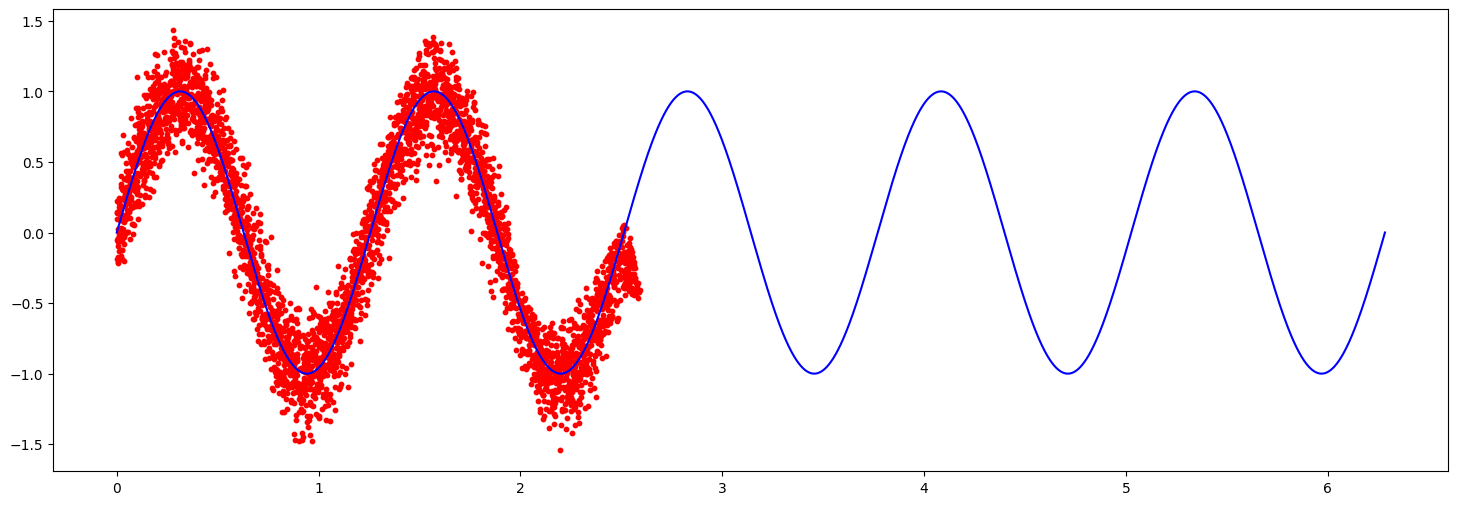

In [28]:
plt.figure(figsize=(18, 6))
plt.plot(x, np.sin(frequency * x), label='True Sinusoidal Signal', color='blue')
plt.scatter(selected_data['x'], selected_data['y'], label='Selected Data', color='red', s=10)